# CIS 545 Homework 2: Graphs

In [16]:
# Execute this once, the first time you run
!pip install networkx

# Disable Python warning messages - you should probably only run this before submission

import warnings
warnings.filterwarnings('ignore')

## Step 2.1 Spark Setup

In [2]:
# TODO: Connect to Spark as per Step 2.1
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs-HW2').getOrCreate()

In [3]:
# Load some dummy data, which should be overwritten in Step 2.2

answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456},\
                                    {'from_node': 456, 'to_node': 789},
                                    {'from_node': 456, 'to_node': 890}])
comments_answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])
comments_questions_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

graph_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])
answers_sdf.show()

+---------+-------+
|from_node|to_node|
+---------+-------+
|      123|    456|
|      456|    789|
|      456|    890|
+---------+-------+



## Step 2.2 Loading

In [3]:
# TODO: load data as per Step 2.2

# Read lines from the text file
answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text")
comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")
comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")

In [6]:
# You may add as many cells as you like here.
# Use Insert | Insert Cell Below

## Step 2.2 Results

In [18]:
answers_sdf.count()

17823525

In [19]:
answers_sdf.show(10)

+----------------+
|           value|
+----------------+
|  9 8 1217567877|
|  1 1 1217573801|
| 13 1 1217606247|
| 17 1 1217617639|
| 48 2 1217618182|
| 17 1 1217618239|
| 19 9 1217618357|
|13 23 1217618560|
|13 11 1217618799|
|23 23 1217619360|
+----------------+
only showing top 10 rows



In [20]:
answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [21]:
comments_answers_sdf.count()

25405374

In [22]:
comments_answers_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|     1 91 1220713630|
|     3 91 1220713792|
|  380 350 1220715736|
|4642 2257 1220734307|
|4642 1324220 1220...|
|2495 4285 1220736640|
|4642 4893 1220737355|
|2515 4903 1220738560|
|2515 4893 1220739071|
|  199 199 1220741079|
+--------------------+
only showing top 10 rows



In [23]:
comments_answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [24]:
comments_questions_sdf.count()

20268151

In [25]:
comments_questions_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|4550 4550 1220729190|
|  242 184 1220733503|
|4213 4946 1220768149|
|    91 91 1220768295|
|2658 1874 1220771891|
|4035 1874 1220773037|
|2257 4489 1220802041|
|  577 577 1220834891|
|4489 4489 1220853536|
| 828 2783 1220854143|
+--------------------+
only showing top 10 rows



In [26]:
comments_questions_sdf.printSchema()

root
 |-- value: string (nullable = true)



## Step 2.3

In [4]:
# TODO: wrangling work in Step 2.3.  Add as many Cells as you need
answers_sdf.createOrReplaceTempView('answers_sdf_view')
answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'answer' AS edge_type FROM answers_sdf_view")
#answers_sdf.show(10)

In [5]:
comments_answers_sdf.createOrReplaceTempView('comments_answers_sdf_view')
comments_answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'comment-on-answer' AS edge_type FROM comments_answers_sdf_view")
#comments_answers_sdf.show(10)

In [6]:
comments_questions_sdf.createOrReplaceTempView('comments_questions_sdf_view')
comments_questions_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'comment-on-question' AS edge_type FROM comments_questions_sdf_view")
#comments_questions_sdf.show(10)

In [7]:
graph_sdf = answers_sdf.unionAll(comments_questions_sdf)
graph_sdf = graph_sdf.unionAll(comments_answers_sdf)

## Step 2.3 Results

In [31]:
answers_sdf.count()

17823525

In [32]:
answers_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [33]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [34]:
comments_answers_sdf.count()

25405374

In [35]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|        edge_type|
+---------+-------+-----------------+
|        1|     91|comment-on-answer|
|        3|     91|comment-on-answer|
|      380|    350|comment-on-answer|
|     4642|   2257|comment-on-answer|
|     4642|1324220|comment-on-answer|
+---------+-------+-----------------+
only showing top 5 rows



In [36]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [37]:
 comments_questions_sdf.count()

20268151

In [38]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|          edge_type|
+---------+-------+-------------------+
|     4550|   4550|comment-on-question|
|      242|    184|comment-on-question|
|     4213|   4946|comment-on-question|
|       91|     91|comment-on-question|
|     2658|   1874|comment-on-question|
+---------+-------+-------------------+
only showing top 5 rows



In [39]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [40]:
graph_sdf.count()

63497050

In [41]:
graph_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [42]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



## Step 2.4

In [11]:
# You may put any computations you need here
new_answers_sdf = answers_sdf.groupBy("from_node").count().sort("count", ascending=False)

In [12]:
distinct_answers_sdf = answers_sdf.select('from_node','to_node').dropDuplicates()
distinct_answers_sdf = distinct_answers_sdf.groupBy("from_node").count().sort("count", ascending=False)

## Step 2.4.1 Results

In [61]:
# TODO: output dataframe with top 10 users by number of questions
new_answers_sdf.show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|32030|
|  1144035|25146|
|    29407|20842|
|   548225|16944|
|   157882|16615|
|   115145|16515|
|    17034|15437|
|   100297|15020|
|     6309|14291|
|    34397|14033|
+---------+-----+
only showing top 10 rows



In [64]:
# TODO: output top 10 users by number of answers to questions by distinct users
distinct_answers_sdf.show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|22860|
|  1144035|21032|
|   548225|14127|
|    29407|13043|
|   115145|12243|
|    19068|12114|
|   100297|11486|
|    34397|11368|
|    17034|11347|
|     6309|11057|
+---------+-----+
only showing top 10 rows



## Step 2.4.2 Results

In [13]:
# TODO: number of users whose questions have never been answered or commented on
ignored_users = comments_questions_sdf.select('to_node').subtract(answers_sdf.select('to_node'))
ignored_users.count()

150681

## Step 2.4.3 Results

In [89]:
# TODO: top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered
repeated_answers_sdf = answers_sdf.select(answers_sdf.from_node, F.when(answers_sdf.from_node != answers_sdf.to_node, answers_sdf.to_node).alias("to_node")).dropna()
repeated_answers_sdf = repeated_answers_sdf.groupBy("from_node","to_node").count().sort("count", ascending=False)
repeated_answers_sdf.show(20)

+---------+-------+-----+
|from_node|to_node|count|
+---------+-------+-----+
|   315935| 742402|  155|
|   217408|2258442|  105|
|     6309| 399145|   81|
|   157882|1391249|   78|
|   157882| 240337|   76|
|     6309| 470184|   76|
|    91299| 167454|   73|
|   505088|  46207|   72|
|   505088| 988445|   69|
|    15168| 366797|   63|
|    29407|   4653|   62|
|   157882| 429377|   61|
|    95810| 234322|   61|
|   157882| 128076|   59|
|   315935|   4653|   58|
|   157882| 530153|   58|
|   127549| 257022|   57|
|   505088| 650492|   56|
|    65358|  51816|   56|
|  1070452|1248295|   56|
+---------+-------+-----+
only showing top 20 rows



# Step 3

In [107]:
# TODO: remove these, which just create dummy data
#highest_indegree_sdf = spark.createDataFrame([{'node': 123, 'indegree': 4}])
#highest_outdegree_sdf = spark.createDataFrame([{'node': 123, 'outdegree': 5}])

# TODO: Fill in according to HW spec
'''
'''
highest_indegree_sdf = graph_sdf.groupBy("to_node").count().sort("count", ascending=False)
highest_indegree_sdf = highest_indegree_sdf.withColumnRenamed('count', 'indegree')
highest_indegree_sdf = highest_indegree_sdf.withColumnRenamed('to_node', 'node')
#highest_indegree_sdf = highest_indegree_sdf.select("indegree","node")

highest_outdegree_sdf = graph_sdf.groupBy("from_node").count().sort("count", ascending=False)
highest_outdegree_sdf = highest_outdegree_sdf.withColumnRenamed('count', 'outdegree')
highest_outdegree_sdf = highest_outdegree_sdf.withColumnRenamed('from_node', 'node')


## Step 3 Results

In [108]:
highest_indegree_sdf.show(5)

+-------+--------+
|   node|indegree|
+-------+--------+
|  22656|   93143|
| 548225|   54410|
|  29407|   45824|
| 157882|   39576|
|1144035|   38909|
+-------+--------+
only showing top 5 rows



In [104]:
highest_outdegree_sdf.show(5)

+-------+---------+
|   node|outdegree|
+-------+---------+
|  22656|   101663|
| 505088|    65522|
|  17034|    65260|
|1491895|    62746|
| 100297|    54330|
+-------+---------+
only showing top 5 rows



## Step 4

In [108]:
# TODO: insert code as you like

In [8]:
#
# Step 4.1 Pre-processing
#
def spark_bfs(G, origins, max_depth):
    
    depth = 0
    schema = StructType([StructField("node", IntegerType(), True)])
    frontier_sdf = spark.createDataFrame(origins, schema)
    G = G.cache()
    frontier_sdf = frontier_sdf.cache()
     
    for depth in range(max_depth):
        reachable_sdf = frontier_sdf.alias('df1').join(G.alias('df2'), F.col('df1.node') == F.col('df2.from_node'))
        reachable_sdf = reachable_sdf.select('to_node')
        
        if depth == 0:           
            visited_sdf = frontier_sdf
            return_sdf = visited_sdf.withColumn('depth_found',F.lit(depth))
        #else:
        #    visited_sdf = visited_sdf.unionAll(frontier_sdf)
        #    return_sdf = return_sdf.unionAll(reached_sdf.withColumn('depth',F.lit(depth)))
        
        #Here I remove both visited and frontier nodes from G
        G = G.join(frontier_sdf, frontier_sdf['node']==G['to_node'], 'leftanti')
        G = G.join(frontier_sdf, frontier_sdf['node']==G['from_node'], 'leftanti')
        
        #Here I update frontier and reached for my next iteration
        frontier_sdf = reachable_sdf
        frontier_sdf = frontier_sdf.distinct().withColumnRenamed('to_node', 'node')
        reached_sdf = reachable_sdf.join(visited_sdf, reachable_sdf['to_node'] == visited_sdf['node'], 'leftanti')
        
        visited_sdf = visited_sdf.unionAll(frontier_sdf)
        return_sdf = return_sdf.unionAll(reached_sdf.withColumn('depth',F.lit(depth+1)))
    
    G = G.unpersist()
    frontier_sdf = frontier_sdf.unpersist()
    
    return return_sdf



## Step 4.1

In [9]:
# TODO: comment out this line once your code is ready
#bfs_sdf = spark.createDataFrame([{'node': 123, 'depth': 1}, {'node': 456, 'depth': 2}])

# TODO: enable this once your code is ready
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)

In [10]:
# TODO: insert code as you like
bfs_sdf.count()

396

## Step 4.1 Results

In [45]:
bfs_sdf.show(10)

+-------+-----------+
|   node|depth_found|
+-------+-----------+
|   4550|          0|
|    242|          0|
|    184|          1|
|  45459|          1|
|   1551|          1|
|  67719|          1|
| 451383|          1|
|1139389|          1|
| 633513|          1|
| 602291|          1|
+-------+-----------+
only showing top 10 rows



## Step 4.2

In [11]:
#
# Step 4.2 Pre-processing
#
def friend_rec(input_sdf, graph_sdf):
    
    end_node = filtered_bfs_sdf.withColumnRenamed('node', 'end_node')
    init_node = filtered_bfs_sdf.withColumnRenamed('node', 'init_node')
    
    
    friend_recommendations_sdf = init_node.join(end_node, init_node['init_node'] != end_node['end_node'])
    #friend_recommendations_sdf = friend_recommendations_sdf.select('init_node', 'end_node')
    
    #Here we eliminate the direct links between pairs
    #We check that the init and end are not corresponding to the from_node and to_node
    friend_recommendations_sdf = friend_recommendations_sdf.join(graph_sdf, (friend_recommendations_sdf['init_node'] == graph_sdf['from_node']) & (friend_recommendations_sdf['end_node'] == graph_sdf['to_node']), 'leftanti')
    friend_recommendations_sdf = friend_recommendations_sdf.join(graph_sdf, (friend_recommendations_sdf['init_node'] == graph_sdf['to_node']) & (friend_recommendations_sdf['end_node'] == graph_sdf['from_node']),'leftanti')
    friend_recommendations_sdf = friend_recommendations_sdf['init_node','end_node']
    
    return friend_recommendations_sdf

In [12]:
# TODO: insert code as you like
filtered_bfs_sdf = bfs_sdf.filter(bfs_sdf['depth_found'] > 1)
filtered_bfs_sdf = filtered_bfs_sdf.groupby(filtered_bfs_sdf['node']).count()
filtered_bfs_sdf = filtered_bfs_sdf.filter(filtered_bfs_sdf['count'] > 1)
#filtered_bfs_sdf.show(5)

In [13]:
# TODO: comment this line out when your function works
#friend_recommendations_sdf = spark.createDataFrame([\
#                                                    {'from_node': 123, 'to_node': 456}, \
#                                                    {'from_node': 456, 'to_node': 123}])


# TODO: enable this when your function works

friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)
friend_recommendations_sdf = friend_recommendations_sdf.cache()

## Step 4.2 Results

In [16]:
friend_recommendations_sdf.count()

1720

In [15]:
friend_recommendations_sdf.repartition(50, 'init_node')
friend_recommendations_sdf.show()

+---------+--------+
|init_node|end_node|
+---------+--------+
|    21918|  453447|
|    21918| 4204628|
|    46646|  267679|
|    59017| 1187554|
|   104015|   55503|
|   211452|   59017|
|   503032| 2269511|
|  1406214|  503032|
|  2269511|   21918|
|  3830157|  132640|
|  4204628|   47550|
|    46646| 1127460|
|    55503|  104015|
|    60602| 1187554|
|   267679| 1061543|
|   393268|  318811|
|  1218595| 1187554|
|  1218595| 4800193|
|    27483|   46646|
|    63775|   46646|
+---------+--------+
only showing top 20 rows



In [21]:
friend_recommendations_sdf = friend_recommendations_sdf.unpersist()

DataFrame[init_node: int, end_node: int]

## Step 4.3: Graph visualization

### Once you have excecuted the cells in Step 4.2 and you have friend_recommendations_sdf, lets create friend_recommendations_df using toPandas(). This creates an in-memory dataFrame that we can use to build the graph. Here we have used ('from_node','to_node') as column names in friend_recommendations_sdf, please change it to what you have used in yours.

In [17]:
import networkx as nx

# TODO: create friend_graph NetworkX graph from friend_recommendations_df from friend_recommendations_sdf
friend_recommendations_df = friend_recommendations_sdf.toPandas()
friend_graph = nx.from_pandas_dataframe(friend_recommendations_df, 'init_node', 'end_node')

## Step 4.3 Results

In [18]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 42
Number of edges in this graph is 860
Graph diameter is 2


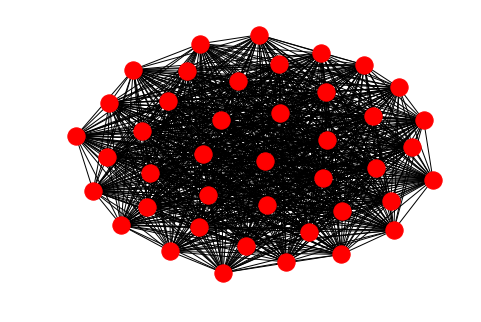

In [19]:
 %matplotlib inline
 nx.draw(friend_graph)